In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt

# Transportation forecasting - looking at mode choice
In the last homework we looked at forecasting the number of people who would commute to an event by mode assuming that travel time is the only factor in making a travel decision. 

**Question 1:** List some of the other factors that you think affect mode choice.

In [2]:
# Answer here


"The California Department of Transportation (Caltrans) conducts the California Household Travel Survey (CHTS) every ten years to obtain detailed information about the socioeconomic characteristics and travel behavior of households statewide." -[Caltrans website](http://www.dot.ca.gov/hq/tpp/offices/omsp/statewide_travel_analysis/chts.html)


The modechoice.csv file contains data from the CHTS on trips that people living in the bay area actually took, and teh mode they chose.

TODO: explain columns here

Note that some modes are not available for some trips for some people - for example some people do not have a drivers license or do not have access to a car. Sometimes biking is infeasible due to distance or restrictions on biking across bridges. 

In [3]:
mc = Table.read_table('data/modechoice.csv')
mc

observation_id,choice,availability_drive_alone,availability_shared_ride_2,availability_shared_ride_3+,availability_walk_transit_walk,availability_drive_transit_walk,availability_walk_transit_drive,availability_walk,availability_bicycle,household_id,person_id,tour_id,tour_origin_taz,primary_dest_taz,age,household_size,household_income,household_income_values,transit_subsidy,transit_subsidy_amount,cross_bay,total_travel_time_drive_alone,total_travel_time_shared_ride_2,total_travel_time_shared_ride_3+,total_travel_time_walk_transit_walk,total_travel_time_drive_transit_walk,total_travel_time_walk_transit_drive,total_travel_time_walk,total_travel_time_bicycle,total_travel_distance_drive_alone,total_travel_distance_shared_ride_2,total_travel_distance_shared_ride_3+,total_travel_distance_walk,total_travel_distance_bicycle,total_travel_cost_drive_alone,total_travel_cost_shared_ride_2,total_travel_cost_shared_ride_3+,total_travel_cost_walk_transit_walk,total_travel_cost_drive_transit_walk,total_travel_cost_walk_transit_drive,age_ctgry,tt,cost,distance,da_tt,s2_tt,s3_tt,wtw_tt,dtw_tt,wtd_tt,walk_tt,bike_tt,da_cost,s2_cost,s3_cost,wtw_cost,dtw_cost,wtd_cost,walk_cost,bike_cost
1,da,1,1,1,1,1,1,1,1,1043613,1,0,1004,969,53,2,6,87500,0,-1,0,20.97,20.97,20.97,83.56,63.05,67.29,167.6,41.9,9.1,9.1,9.1,8.38,8.38,1.6817,0.9609,0.6726,5.84,3.22,3.02,45-65,20.97,1.6817,9.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,da,1,1,1,1,1,1,1,1,1043613,1,1,1004,969,53,2,6,87500,0,-1,0,22.16,22.16,22.16,87.38,77.79,58.01,167.6,41.9,9.1,9.1,9.1,8.38,8.38,1.6817,0.9609,0.6726,4.83,3.22,3.22,45-65,22.16,1.6817,9.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,s2,1,1,1,1,1,1,0,0,1045607,1,0,908,116,57,1,4,42500,0,-1,1,47.98,47.98,47.98,140.63,131.49,137.39,nan,nan,31.94,31.94,31.94,nan,nan,9.1125,5.2071,3.645,6.95,7.75,5.98,45-65,47.98,5.2071,31.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,bike,0,1,1,1,0,1,1,1,1049908,1,0,30,12,50,1,2,17500,0,-1,0,nan,15.05,15.05,26.46,nan,16.77,42.8,10.7,nan,2.23,2.23,2.14,2.14,nan,0.2355,0.1649,3.22,nan,3.22,45-65,10.7,0,2.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,walk,0,1,1,1,0,1,1,1,1049908,1,1,30,9,50,1,2,17500,0,-1,0,nan,11.72,11.72,43.86,nan,28.89,19.2,4.8,nan,0.96,0.96,0.96,0.96,nan,0.1014,0.071,3.22,nan,3.22,45-65,19.2,0,0.96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,s2,1,1,1,1,1,1,1,1,1051388,2,0,89,4,48,3,7,125000,0,-1,0,26.32,26.32,26.32,42.1,55.48,58.48,143.2,35.8,7.4,7.4,7.4,7.16,7.16,1.3675,0.7815,0.547,3.22,3.98,3.22,45-65,26.32,0.7815,7.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,da,1,1,1,1,1,1,1,1,1051388,2,1,89,23,48,3,7,125000,0,-1,0,32.07,32.07,32.07,86.89,91.7,83.35,184.8,46.2,9.47,9.47,9.47,9.24,9.24,1.7501,1,0.7,3.22,3.22,3.22,45-65,32.07,1.7501,9.47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,s3,1,1,1,1,1,1,1,1,1051388,3,0,89,71,10,3,7,125000,0,-1,0,16.58,16.58,16.58,53.32,46.76,46.77,94,23.5,4.7,4.7,4.7,4.7,4.7,0.8686,0.4964,0.3474,3.22,3.22,3.22,5-19,16.58,0.3474,4.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,wtrnw,1,1,1,1,1,1,1,0,1069723,1,0,86,12,50,2,5,62500,0,-1,0,21.93,21.93,21.93,54.13,42.72,44.78,95.6,nan,4.87,4.87,4.87,4.78,nan,0.9,0.5143,0.36,3.22,3.22,3.22,45-65,54.13,3.22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,walk,1,1,1,1,1,1,1,1,1093539,1,0,90,111,56,3,8,175000,1,999998,0,33.13,33.13,33.13,100.65,100.39,100.39,192.4,48.1,9.86,9.86,9.86,9.62,9.62,1.8222,1.0412,0.7288,3.22,3.22,3.22,45-65,192.4,0,9.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Travel time comparison

As mentioned in HW4, travel time is an important factor in choosing travel mode. Often the travel time driving alone is shorter than the travel time to take transit, yet many people still choose to take transit.

Below we will compare the travel times for people who chose to drive vs. people who chose to walk to transit.  The *delta travel time* (transit travel time - drive alone time) is calculated for each trip. We then create a histogram of the *delta travel times* for people who chose to take transit. 

**Task 1** Create a histogram of *delta travel times* for people who chose to drive and overlay it on the histogram of *delta travel times* for people who chose to take transit.


**Question 2:** Comment on the differences in the two histograms. 
<li> What is the approximate median delta travel time for people who drove? <li>What is the approximate median delta travel time for people who chose to take transit? <li>Which median is higher? Why?

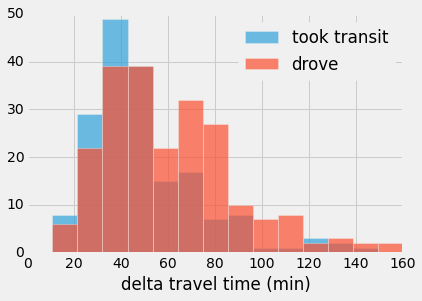

In [4]:
# Get only columns where both drive and walk to transit are available
transit_drive_avail = mc.where('availability_drive_alone',1).where('availability_walk_transit_walk',1)


# Store the rows for trips taken in transit in a table called took_transit
took_transit = transit_drive_avail.where('choice','wtrnw')

# Your task: Create a table called drove and store the rows for where choice = 'da'
## drove = transit_drive_avail.where('choice','da')


# Compute the difference in travel time for people who took transit
chose_wtw_tt_delta = (took_transit.column('total_travel_time_walk_transit_walk')-
                      took_transit.column('total_travel_time_drive_alone'))
# Your task: Compute the difference in travel time for people who drove
## chose_drive_tt_delta = (drove.column('total_travel_time_walk_transit_walk')
##                         -drove.column('total_travel_time_drive_alone'))

# Create histograms of the differences:
my_bins = np.linspace(0,160,16)
plt.hist(chose_wtw_tt_delta, alpha=.7, bins=my_bins, label = 'took transit')

# Your task: Add the chose_drive_tt_delta histogram here. 
# Make sure to label it appropriately and use the same bins as transit
## plt.hist(chose_drive_tt_delta, alpha=.7, bins=my_bins, label='drove')
plt.legend()
plt.xlabel('delta travel time (min)')


In [5]:
# your answers here

## Comparing travel time and cost
People likely are not only considering travel time when they select a travel mode, they are probably also considering the cost of each mode. People are more likely to drive if driving is significantly cheaper or the travel time is significantly lower. Note that the drive alone cost only contains an 

Below is a scatter plot showing delta travel time (drive time-transit time) on the x-axis vs. delta travel cost (drive cost-transit cost) on the y-axis for people who chose to take transit. 

**Task 2:** Create a scatter plot of delta travel time vs. delta travel cost for **people who chose to drive**. Make this scatter plot **red** and overlay it on the scatter plot of delta travel time vs. delta travel cost for people who took tranist. 

**Question 3:** You know a traveler wants to make a trip from pt A to B in SF. The delta travel time is 25 minutes. The delta cost is \$1.50. Do you think this scatter plot might be useful for predicting their travel mode? Why or why not? Based on the scatter plot, what we see in the scatter plot, what mode would you guess they would take?

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


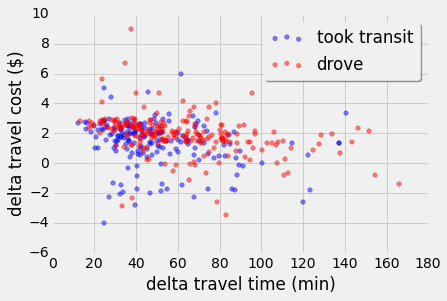

In [6]:
# Compute the cost delta for transit cost vs. drive alone cost for people who took tranist
chose_wtw_cost_delta = (took_transit.column('total_travel_cost_walk_transit_walk')
                        -took_transit.column('total_travel_cost_drive_alone'))

# Your task: Compute the cost delta for transit cost vs. drive alone cost for people who drove
## chose_drive_cost_delta = drove.column('total_travel_cost_walk_transit_walk')-drove.column('cost')


# Create a scatter plot of travel time delta vs. travel cost delta 
# for people who chose to drive.
plt.scatter(chose_wtw_tt_delta, chose_wtw_cost_delta, color='blue', alpha=.5, label = 'took transit')

# Your task: Create a scatter plot of travel time delta vs. travel cost delta 
# for people who chose to drive. Label it 'drove' and color it red
## plt.scatter(chose_drive_tt_delta, chose_drive_cost_delta, color='red', alpha=.5, label='drove')

plt.xlabel('delta travel time (min)')
plt.ylabel('delta travel cost ($)')
plt.legend(shadow=True)

@Alexei - could have them do the same comparing bike tris to walk to transit trips when both modes are available per below. What do you think?

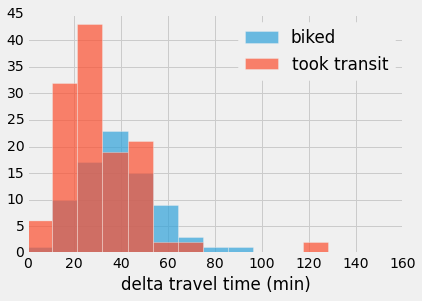

In [7]:
# Get only columns where both drive and walk to transit are available
transit_bike_avail = mc.where('availability_bicycle',1).where('availability_walk_transit_walk',1)

# Store the rows for trips taken on transit in one Table, the trips for people who drove in another
took_transit = transit_bike_avail.where('choice','wtrnw')
biked = transit_bike_avail.where('choice','bike')

# Compute the difference in travel time 
chose_wtw_tt_delta = took_transit.column('tt')-took_transit.column('total_travel_time_bicycle')
chose_bike_tt_delta = biked.column('total_travel_time_walk_transit_walk')-biked.column('tt')

# Create histograms of the differences:
my_bins = np.linspace(0,160,16)
plt.hist(chose_bike_tt_delta, alpha=.7, bins=my_bins, label='biked')
plt.hist(chose_wtw_tt_delta, alpha=.7, bins=my_bins, label = 'took transit')
plt.legend()
plt.xlabel('delta travel time (min)')

## Adding demographic data:
Different demographics may have different mode preferences. For example people in the 20-44 may be more likely to bike then people over 65, for example. 

**Task 3:** Create a [pivot](http://data8.org/datascience/_autosummary/datascience.tables.Table.pivot.html?highlight=pivot#datascience.tables.Table.pivot) table where we count the number of people who choose each mode per age_ctgry. Create a [barh](http://data8.org/datascience/_autosummary/datascience.tables.Table.barh.html#datascience.tables.Table.barh) graph to visualize the results.

**Question 4:** If we knew that the traveler mentioned in question 3 was 53 years old, does your answer to question 3 change? Do you think they are more likely to drive or take transit?

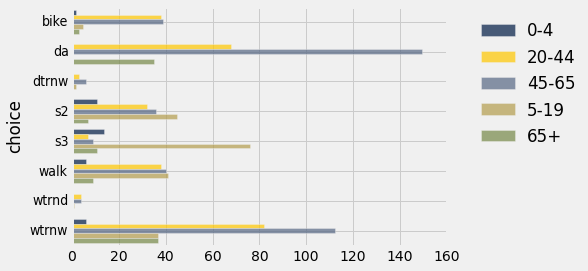

In [8]:
# Your code here:

#Answer key:
mc_pivot = mc.pivot('age_ctgry','choice')

mc_pivot.barh('choice')

In [ ]:
# Your answer here